In [1]:
#......classification of MNSIT data(using KNN)...........

from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)
predicted = knn.predict(X=X_test)
expected = y_test
print(f'{knn.score(X_test, y_test):.2%}')





97.78%


In [2]:
#......creation of confusing matrix............
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]


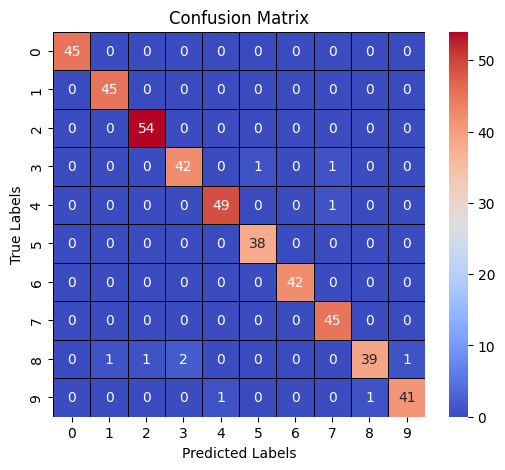

In [3]:
#..........plotting of confusion matrix............
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, linecolor="black")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [4]:
#......KFold cross validation...........
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=digits.data,y=digits.target, cv=kfold)
print(scores)
print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')


[0.97777778 0.99444444 0.98888889 0.97777778 0.98888889 0.99444444
 0.97777778 0.98882682 1.         0.98324022]
Mean accuracy: 98.72%
Accuracy standard deviation: 0.75%


In [5]:
#.......comparing multiple models..........................
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
estimators = {'KNeighborsClassifier': knn,'SVC': SVC(gamma='scale'),'GaussianNB': GaussianNB()}
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +f'mean accuracy={scores.mean():.2%}; ' +f'standard deviation={scores.std():.2%}')
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%
k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.39%; standard deviation=0.80%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.55%; standard deviation=1.06%
k=19; mean accuracy=97.66%; standard deviation=0.96%
